In [2]:
from keras.utils.io_utils import HDF5Matrix
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd

# fix random seed for reproducibility
np.random.seed(42)

In [18]:
# Read in partial dataset for debugging
input_file = "/data/scratch/rcurrie/tumor_normal.h5"
X = HDF5Matrix(input_file, 'X')
y = HDF5Matrix(input_file, 'y')
classes = HDF5Matrix(input_file, 'classes')

In [19]:
%%time
# Split into stratified training and test sets
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(X, classes):
    X_train, X_test = X.data.value[train_index], X.data.value[test_index]
    y_train, y_test = y.data.value[train_index], y.data.value[test_index]
    classes_train, classes_test = classes.data.value[train_index], classes.data.value[test_index]

CPU times: user 6min 29s, sys: 4.19 s, total: 6min 33s
Wall time: 6min 33s


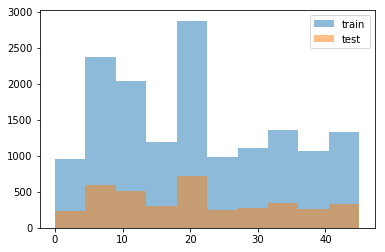

In [20]:
# Plot relative amount in each class
import random
import numpy
from matplotlib import pyplot
pyplot.hist(classes_train, alpha=0.5, label='train')
pyplot.hist(classes_test, alpha=0.5, label='test')
pyplot.legend(loc='upper right')
pyplot.show()

In [28]:
from keras.layers import Dense, Dropout, Activation

model = Sequential()

# ~600 genes in cancer http://cancer.sanger.ac.uk/census/
model.add(Dense(800, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=5, shuffle='batch', batch_size=32)

Epoch 1/5
  480/15300 [..............................] - ETA: 736s - loss: 7.7866 - acc: 0.5021 

In [24]:
model.evaluate(X_test, y_test, batch_size=32)

3826/3826 [==============================] - 8s      

[7.2417684396523425, 0.55070569785676948]